In [1]:
from obspy import read
from obspy import Trace
import h5py
from obspy.signal.trigger import classic_sta_lta
from obspy.signal.trigger import plot_trigger
import matplotlib.pyplot as plt

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load data from the hd5 file
data = h5py.File("train/scsn_p_2000_2017_6sec_0.5r_pick_train.hdf5", "r")

for key in data:
    print(key)

X
Y
dist
evids
fm
mag
sncls
snr


In [3]:
X = data["X"]
Y = data["Y"]
mag = data["mag"]

Text(0.5,1,'Magnitudes of Earthquake Data')

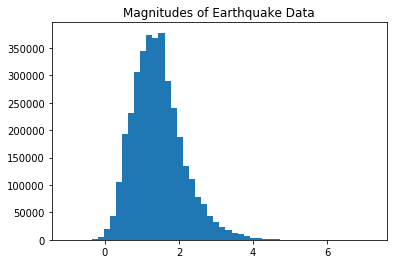

In [4]:
fig, ax = plt.subplots()
ax.hist(mag, bins=50)
ax.set_title("Magnitudes of Earthquake Data")

In [8]:
BATCH = 50

waveforms = []
for i in range(BATCH):
    waveforms.append(Trace(X[i]))

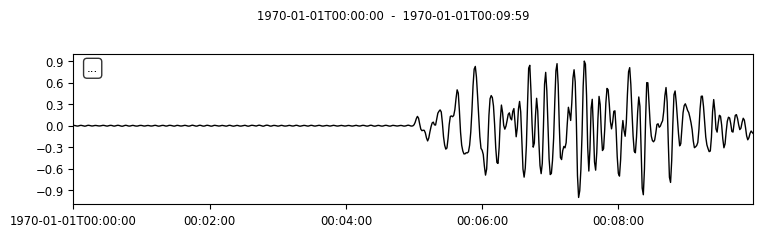

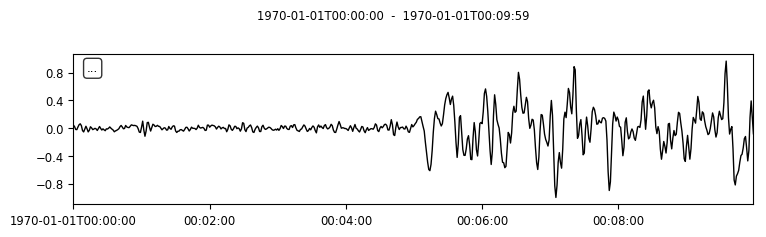

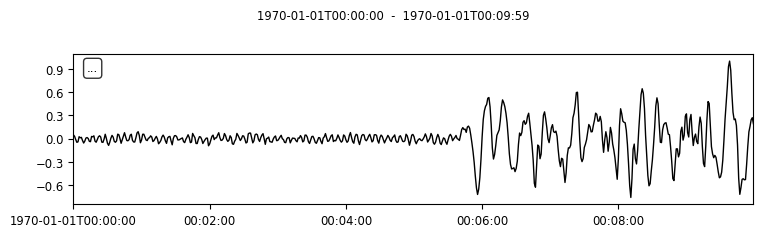

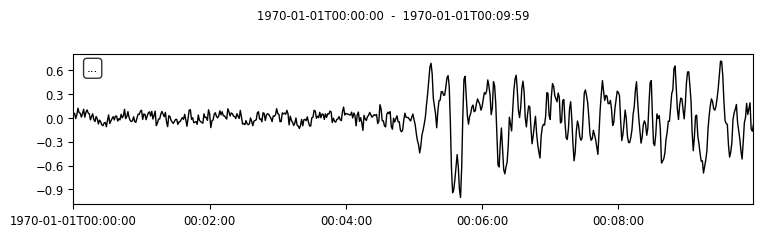

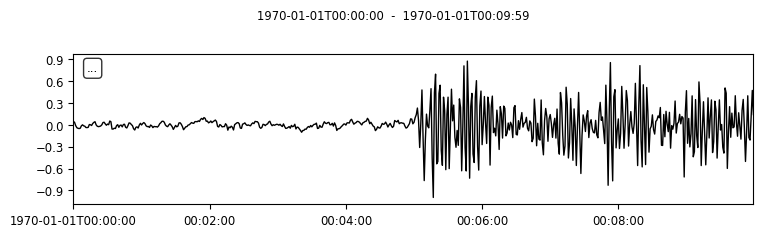

In [9]:
# Check data
for i in range(5):
    waveforms[i].plot()

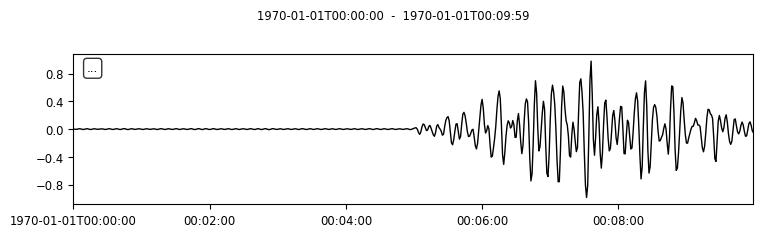

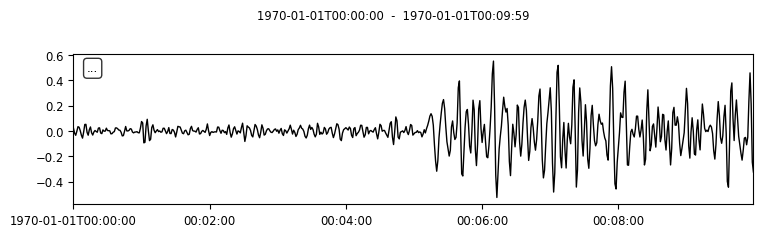

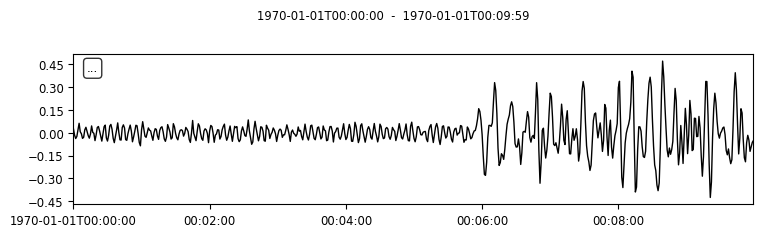

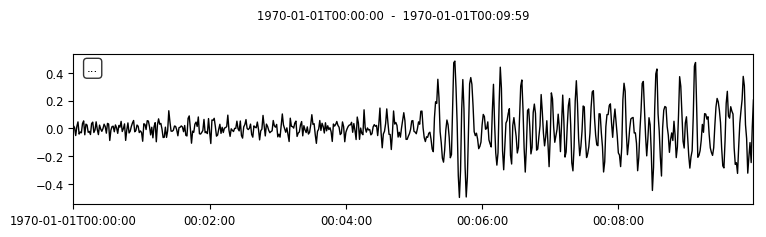

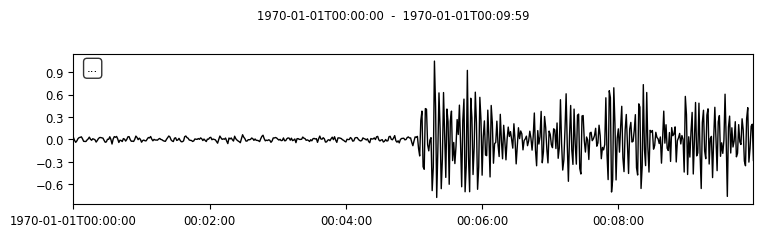

In [10]:
# Apply a highpass filter to the data
for i in range(5):
    waveform = waveforms[i].copy()
    waveform.filter("highpass", freq=0.075).plot()

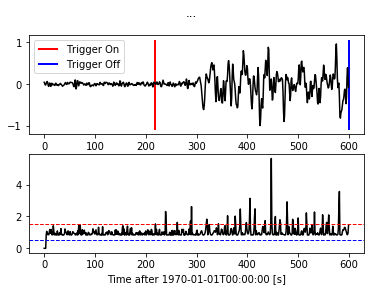

In [33]:
# Apply the STA/LTA triggering algorithm to the waveform
df = waveforms[1].stats.sampling_rate
cft = classic_sta_lta(waveforms[1].data, int(6 * df), int(5* df))
plot_trigger(waveforms[1], cft, 1.5, 0.5)

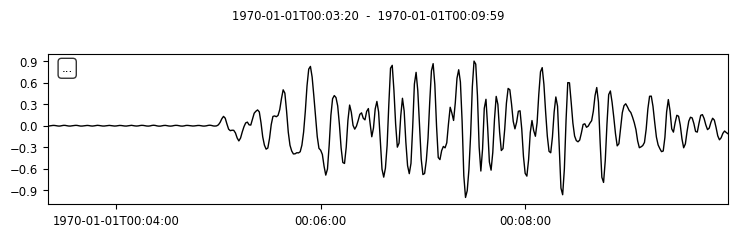

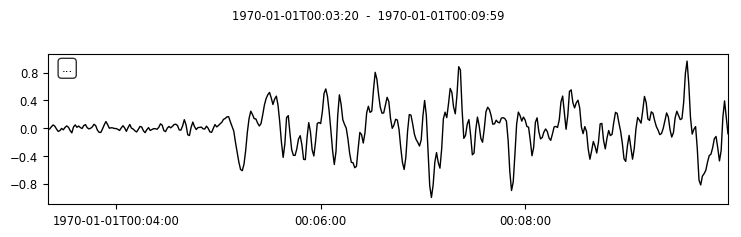

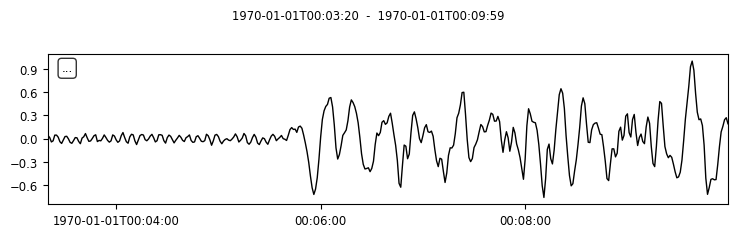

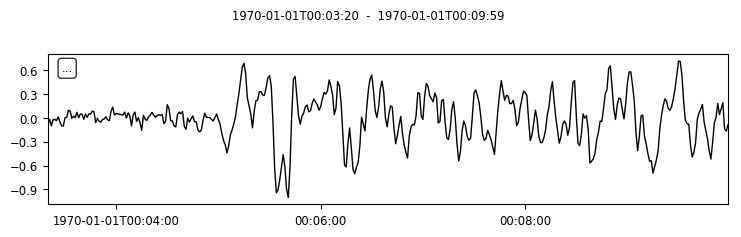

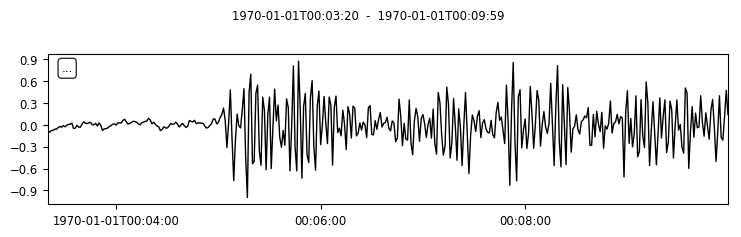

In [203]:
# Trimming the data to four seconds
for i in range(5):
    waveform = waveforms[i].copy()
    t = waveform.stats.starttime
    
    waveform.trim(t + 200, t + 600)
    waveform.plot()